In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.insert(1, '../')

import experiment
import pickle
from utils import *
from Architectures import *
import random, os
suppress_warnings()
EPOCHS = 256


def countp(model, params):
    tmp = model(**params)
    tmp.build(input_shape=(1,15,7))
    return tmp.count_params()


n_params = []

os.environ['PYTHONHASHSEED']=str(0)
tf.random.set_seed(42)
np.random.seed(42)
random.seed(42)

def human_format(num):
    magnitude = 0
    while abs(num) >= 1000:
        magnitude += 1
        num /= 1000.0
    # add more suffixes if you need them
    return '%.0f%s' % (num, ['', 'K', 'M', 'G', 'T', 'P'][magnitude])


filename = '../data/data100k_raw_combined_atlas_cut.pkl'
n_experiments = 8
SUFFIX = 'latent28'


#TESTING ######
# EPOCHS = 2
# filename = '../data/data50k_raw_combined_atlas_cut_small.pkl'
# n_experiments = 2
# SUFFIX = 'latent28'
###########

ERROR in cling::CIFactory::createCI(): cannot extract standard library include paths!
Invoking:
  LC_ALL=C x86_64-conda-linux-gnu-c++  -O3 -DNDEBUG -xc++ -E -v /dev/null 2>&1 | sed -n -e '/^.include/,${' -e '/^ \/.*++/p' -e '}'
Results was:
With exit code 0


Welcome to JupyROOT 6.22/08


2022-10-02 23:01:05.498001: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [3]:
import seaborn as sns
import os

#to get latex to work 
os.environ['PATH'] = "%s:/usr/local/cuda-11.2/bin:/usr/local/bin:/usr/bin:/usr/local/sbin:/usr/sbin:/opt/anaconda/bin:/home/delon/texlive/bin/x86_64-linux:/home/delon/.local/bin:/home/delon/bin"%os.environ['PATH']


PIl64 = experiment.Experimenter(filename)
PIl64.fromSaved()

PI = experiment.Experimenter(filename)
PI.fromSaved(suffix=SUFFIX)

Initializing Experimenter
	Loading Data from ../data/data100k_raw_combined_atlas_cut.pkl
	Data Loaded
	Creating Splits
	Splits Created
Done initalizing
Loading Experimenter from Saved Experimenter at /data/delon/experimenter/data100k_raw_combined_atlas_cut
Experimenter Loaded
Getting split
Split Stored
Loading models
{'nested_concat_70_4_64_3': 'models/data100k_raw_combined_atlas_cut_nested_concat_70_4_64_3', 'nested_concat_general_68_3_64_3': 'models/data100k_raw_combined_atlas_cut_nested_concat_general_68_3_64_3', 'particlewise_128_4_64': 'models/data100k_raw_combined_atlas_cut_particlewise_128_4_64', 'tripletwise_5_(64, 128, 256, 128, 64)_64': 'models/data100k_raw_combined_atlas_cut_tripletwise_5_(64, 128, 256, 128, 64)_64', 'pairwise_5_(64, 128, 256, 128, 64)_64': 'models/data100k_raw_combined_atlas_cut_pairwise_5_(64, 128, 256, 128, 64)_64', 'pairwise_nl_5_(64, 128, 256, 128, 64)_32_64': 'models/data100k_raw_combined_atlas_cut_pairwise_nl_5_(64, 128, 256, 128, 64)_32_64', 'pairwis

2022-10-02 23:01:44.826362: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2022-10-02 23:01:44.855521: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:84:00.0 name: Tesla K80 computeCapability: 3.7
coreClock: 0.8235GHz coreCount: 13 deviceMemorySize: 11.17GiB deviceMemoryBandwidth: 223.96GiB/s
2022-10-02 23:01:44.856960: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 1 with properties: 
pciBusID: 0000:85:00.0 name: Tesla K80 computeCapability: 3.7
coreClock: 0.8235GHz coreCount: 13 deviceMemorySize: 11.17GiB deviceMemoryBandwidth: 223.96GiB/s
2022-10-02 23:01:44.857060: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2022-10-02 23:01:44.898086: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2022-10-02 23:0

In [4]:
latent64 = PIl64.models['%s_%s'%('pairwise', PIl64.get_tail_string(model_params_dict['pairwise']))]
latent2 = PI.models['latent_two_5_(64, 128, 256, 128, 2)_64']
latent8 = PI.models['latent_eight_5_(64, 128, 256, 128, 8)_64']

In [5]:
PI.get_ROC('latent_two', model_params_dict['latent_two'])

getting ROC for latent_two
currently on latent_two_5_(64, 128, 256, 128, 2)_64


(array([0.        , 0.        , 0.        , ..., 0.9779992 , 0.97806607,
        1.        ]),
 array([0.00000000e+00, 3.32314236e-05, 4.95148212e-03, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]),
 array([1.99984789e+00, 9.99847889e-01, 9.98715162e-01, ...,
        2.04723401e-05, 2.04274475e-05, 1.10760734e-10], dtype=float32),
 0.9602683007898865)

2022-10-02 23:02:41.991717: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-10-02 23:02:41.992836: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2099935000 Hz
2022-10-02 23:02:44.053836: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2022-10-02 23:02:44.813272: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8201
2022-10-02 23:02:46.021313: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2022-10-02 23:02:46.596348: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11


In [6]:
PI.update_data(suffix=SUFFIX)

	Data Loaded
	Creating Splits
now saving paramters of experimenter
saved experimenter at /data/delon/experimenter/data100k_raw_combined_atlas_cutlatent28


In [7]:
PIl64.update_data()

	Data Loaded
	Creating Splits
now saving paramters of experimenter
saved experimenter at /data/delon/experimenter/data100k_raw_combined_atlas_cut


In [8]:
X_test_latent, y_test_latent = PI.get_test_dataset('latent_two')
X_test, y_test = PIl64.get_test_dataset('pairwise')


In [9]:
X_test_ATLAS, y_test_ATLAS = gen_dataset_high_level(PIl64.events_test, PIl64.events_oup_test, PIl64.events_tag_test)

100%|██████████| 60000/60000 [00:38<00:00, 1550.88it/s]


In [10]:
n_cut = int(len(X_test)*0.1)
n_cut = 15000
assert(len(X_test) == len(X_test_latent))

indices = np.random.permutation(len(X_test))
cut = np.s_[indices[:n_cut]]

latent_label = y_test.numpy()[cut]
latent_label_28 = y_test_latent.numpy()[cut]

In [11]:
print(n_cut)

15000


In [12]:
latent2_embedded = compute_tsne(latent2, cut=cut, X_test=X_test_latent, perplexity=[1000,1998], euclid=True)

2
computing tsne
--------------------------------------------------------------------------------
TSNE(initialization='random', n_jobs=-1, perplexity=1000, random_state=42,
     verbose=True)
--------------------------------------------------------------------------------
===> Finding 3000 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 20.49 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 41.93 seconds
===> Running optimization with exaggeration=12.00, lr=1250.00 for 250 iterations...
Iteration   50, KL divergence 2.6439, 50 iterations in 5.3313 sec
Iteration  100, KL divergence 2.0034, 50 iterations in 4.6436 sec
Iteration  150, KL divergence 1.9476, 50 iterations in 4.5811 sec
Iteration  200, KL divergence 1.9477, 50 iterations in 4.7123 sec
Iteration  250, KL divergence 1.9477, 50 iterations in 4.6812 sec
   --> Time elapsed: 23.95 seconds
===> Running optimization with exaggeration=1.00, lr=1250.00 for 500 iteratio

[ 3.24007488e-16 -4.54747351e-17] [14.73072588  6.65449338]
computing EMD with N= 15000
computed EMD with N=15000
	EMD: 0.813
earth_movers_distance 0.8126986708839647


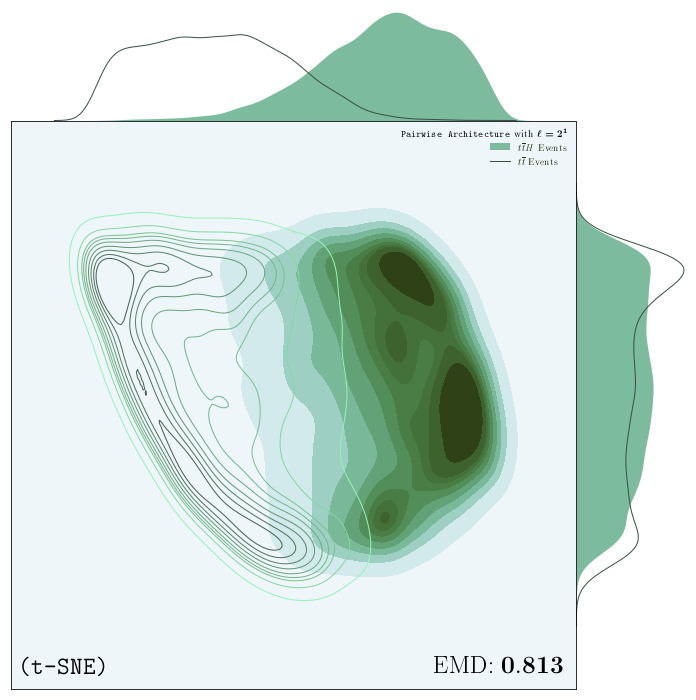

In [13]:
ax = gen_tsne(latent2_embedded, latent_label_28, text=r'{\texttt{Pairwise Architecture} with} \boldmath$\mathbf{\ell=2^1}$',
             cmap=sns.cubehelix_palette(start=14/10, light=.97, as_cmap=True), col_aux='#95f4b7')
ax.savefig('figures/l2_tsne.pdf')

In [14]:
latent64_embedded = compute_tsne(latent64, X_test=X_test, cut=cut)

64
computing tsne
--------------------------------------------------------------------------------
TSNE(initialization='random', metric='cosine', n_jobs=-1, perplexity=1000,
     random_state=42, verbose=True)
--------------------------------------------------------------------------------
===> Finding 3000 nearest neighbors using Annoy approximate search using cosine distance...
   --> Time elapsed: 17.46 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 57.36 seconds
===> Running optimization with exaggeration=12.00, lr=1250.00 for 250 iterations...
Iteration   50, KL divergence 2.5641, 50 iterations in 5.4873 sec
Iteration  100, KL divergence 2.4571, 50 iterations in 5.5528 sec
Iteration  150, KL divergence 2.4009, 50 iterations in 5.5523 sec
Iteration  200, KL divergence 2.4009, 50 iterations in 5.4714 sec
Iteration  250, KL divergence 2.4009, 50 iterations in 5.5518 sec
   --> Time elapsed: 27.62 seconds
===> Running optimization with exaggeration=1.00, lr=1250.00 f

In [15]:
ATLAS_embedded = compute_tsne_embedded(np.array(X_test_ATLAS)[cut])

8
computing tsne
--------------------------------------------------------------------------------
TSNE(initialization='random', metric='cosine', n_jobs=-1, perplexity=1000,
     random_state=42, verbose=True)
--------------------------------------------------------------------------------
===> Finding 3000 nearest neighbors using Annoy approximate search using cosine distance...
   --> Time elapsed: 18.14 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 57.62 seconds
===> Running optimization with exaggeration=12.00, lr=1250.00 for 250 iterations...
Iteration   50, KL divergence 2.6297, 50 iterations in 5.5208 sec
Iteration  100, KL divergence 2.3493, 50 iterations in 5.6013 sec
Iteration  150, KL divergence 2.3484, 50 iterations in 5.4450 sec
Iteration  200, KL divergence 2.3484, 50 iterations in 5.6061 sec
Iteration  250, KL divergence 2.3484, 50 iterations in 5.6521 sec
   --> Time elapsed: 27.83 seconds
===> Running optimization with exaggeration=1.00, lr=1250.00 fo

In [16]:
latent8_embedded = compute_tsne(latent8, cut=cut, X_test=X_test_latent)

8
computing tsne
--------------------------------------------------------------------------------
TSNE(initialization='random', metric='cosine', n_jobs=-1, perplexity=1000,
     random_state=42, verbose=True)
--------------------------------------------------------------------------------
===> Finding 3000 nearest neighbors using Annoy approximate search using cosine distance...
   --> Time elapsed: 18.09 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 54.84 seconds
===> Running optimization with exaggeration=12.00, lr=1250.00 for 250 iterations...
Iteration   50, KL divergence 2.6086, 50 iterations in 5.5288 sec
Iteration  100, KL divergence 2.4265, 50 iterations in 5.4777 sec
Iteration  150, KL divergence 2.4235, 50 iterations in 4.8643 sec
Iteration  200, KL divergence 2.4235, 50 iterations in 4.7467 sec
Iteration  250, KL divergence 2.4235, 50 iterations in 4.7569 sec
   --> Time elapsed: 25.38 seconds
===> Running optimization with exaggeration=1.00, lr=1250.00 fo

[-1.44003328e-16  5.30538576e-17] [9.12618068 9.04338386]
computing EMD with N= 15000
computed EMD with N=15000
	EMD: 0.742
earth_movers_distance 0.7417435061464566


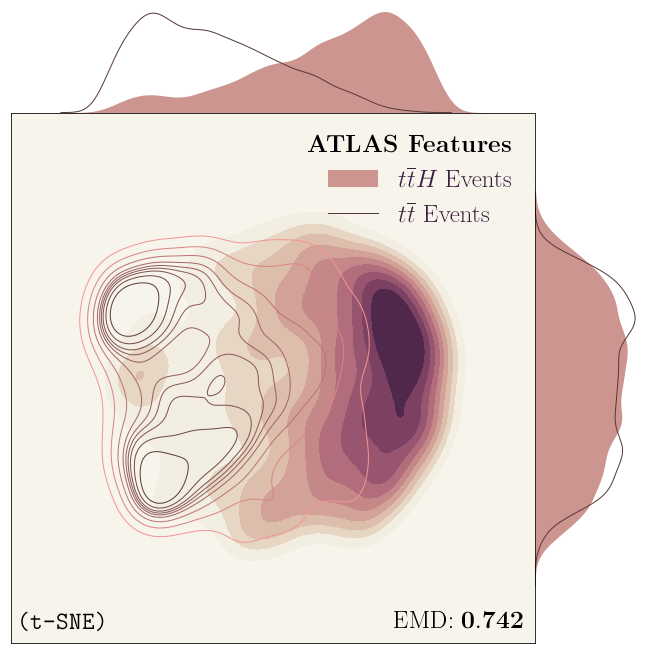

In [17]:
axATLAS = gen_tsne(ATLAS_embedded, latent_label, text=r'\textbf{ATLAS Features}',
                   cmap = sns.cubehelix_palette(start=2/10, light=.97, as_cmap=True), col_aux='#f49595')
axATLAS.savefig('figures/ATLAS_tsne.pdf')

[-2.27373675e-17 -1.32634644e-17] [10.56041457  5.03457571]
computing EMD with N= 15000
computed EMD with N=15000
	EMD: 0.909
earth_movers_distance 0.909483140337614


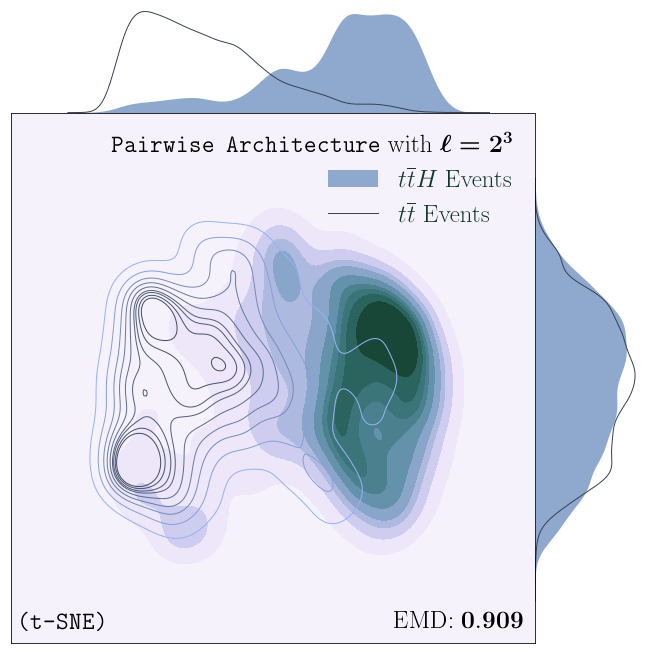

In [18]:
ax = gen_tsne(latent8_embedded, latent_label_28, text=r'{\texttt{Pairwise Architecture} with} \boldmath$\mathbf{\ell=2^3}$',
              cmap=sns.cubehelix_palette(start=20/10, light=.97, as_cmap=True), col_aux='#95b3f4')
ax.savefig('figures/l8_tsne.pdf')

[1.97057185e-16 1.55372012e-16] [7.19175692 5.69874932]
computing EMD with N= 15000
computed EMD with N=15000
	EMD: 0.952
earth_movers_distance 0.9521729347244041


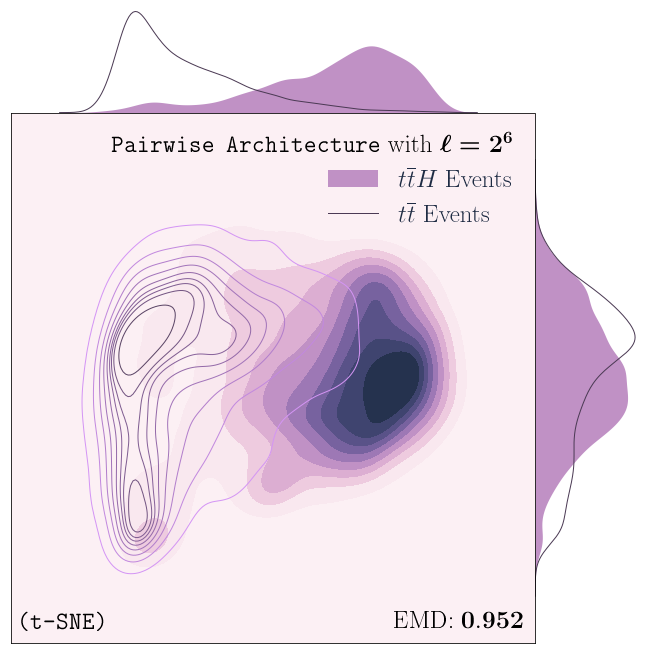

In [22]:
axl64 = gen_tsne(latent64_embedded, latent_label, text=r'{\texttt{Pairwise Architecture} with} \boldmath$\mathbf{\ell=2^6}$ ',
                )
axl64.savefig('figures/l64_tsne.pdf')

[9.662037 8.027242] [12.327544  9.813144]


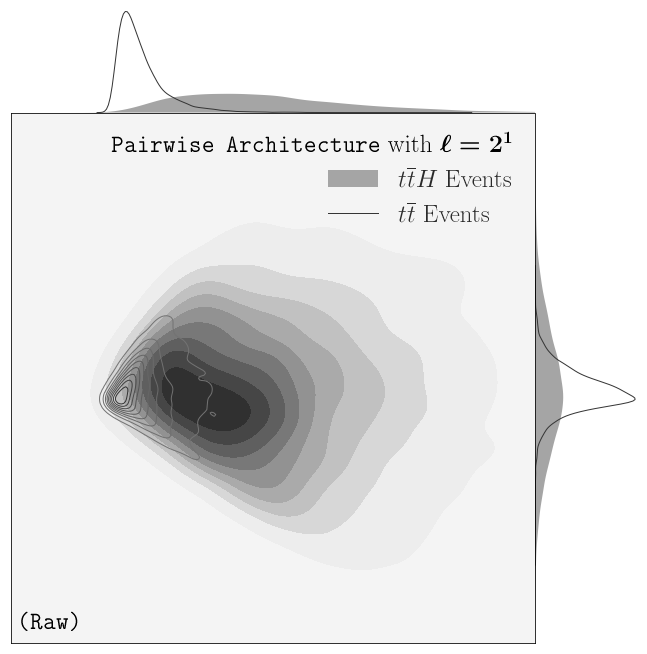

In [23]:
l2_yhat = LatentGetter(latent2.layers[0:3], condensed=True).predict(X_test_latent.numpy()[cut])
no_tsne= gen_tsne(l2_yhat, y_test_latent.numpy()[cut], text=r'{\texttt{Pairwise Architecture} with} \boldmath$\mathbf{\ell=2^1}$',
                  cmap=sns.cubehelix_palette(start=14/10, light=.97, as_cmap=True, hue=0), col_aux='#737373',
                  EMD=False, aux_text=r"\texttt{(Raw)}",
         rotated=True, log=False, bnds=True, standardized=False)
no_tsne.savefig('figures/l2_notsne.pdf')

[ 3.24007488e-16 -4.54747351e-17] [14.73072588  6.65449338]


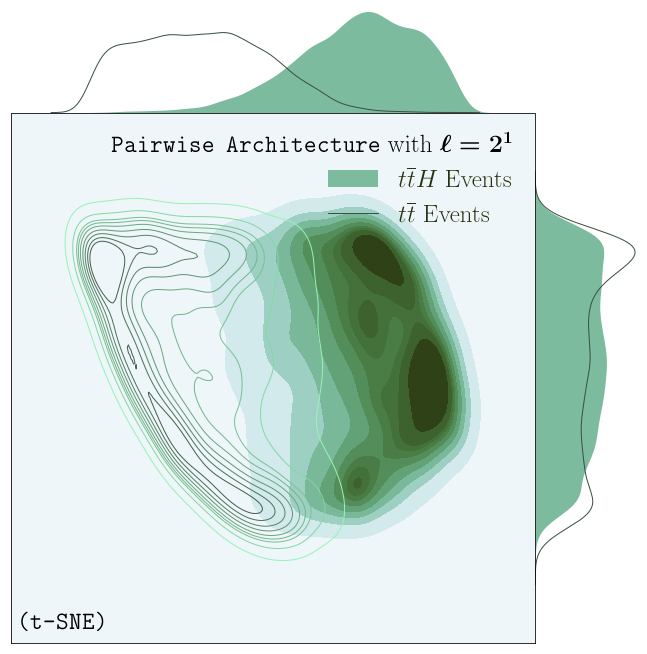

In [24]:
ax = gen_tsne(latent2_embedded, latent_label_28, text=r'{\texttt{Pairwise Architecture} with} \boldmath$\mathbf{\ell=2^1}$',
             cmap=sns.cubehelix_palette(start=14/10, light=.97, as_cmap=True), col_aux='#95f4b7',
              EMD=False)
ax.savefig('figures/l2_tsne_waxis.pdf')

[ 3.24007488e-16 -4.54747351e-17] [14.73072588  6.65449338]
earth_movers_distance 0.8126986708839647


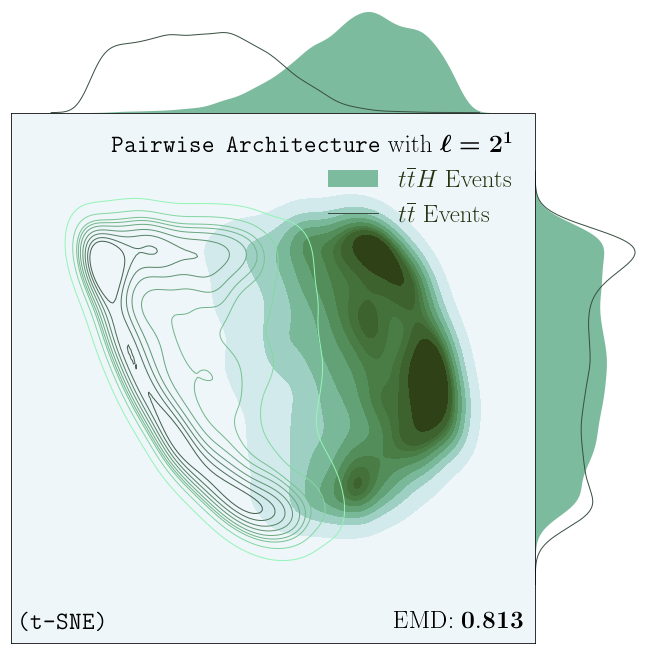

In [25]:
ax = gen_tsne(latent2_embedded, latent_label_28, text=r'{\texttt{Pairwise Architecture} with} \boldmath$\mathbf{\ell=2^1}$',
             cmap=sns.cubehelix_palette(start=14/10, light=.97, as_cmap=True), col_aux='#95f4b7', precomputed=True)
ax.savefig('figures/l2_tsne.pdf')